In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
import tensorflow as tf

1.Loading the Data


In [15]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [18]:
import sys
import keras
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))

Python: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]
Keras: 2.2.4


In [19]:
#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 52s 0us/step


In [20]:
#Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [21]:
# A single image
print(X_train[0].shape)


(32, 32, 3)


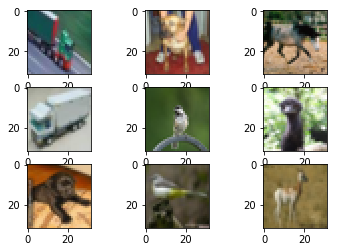

In [37]:
# create a grid of 3*3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[50 + i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [31]:
#Preprocessing the dataset

#fix a random seed for reproducibility

seed = 6
np.random.seed(seed)

#load the data
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

# normlaize the inputs from 0-255 to 0,0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [33]:
# class labels shape
print(y_train.shape)
print(y_train[0])


(50000, 1)
[6]


In [35]:
# [6] = [0, 0, 0, 0, 0, 0, 1, 0, 0] one-hot vector

# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_class = Y_test.shape[1]
print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


3. Building All-CNN

Table 1: The All-CNN-C networks used for classification on CIFAR-10 and CIFAR-100.
Model- C
* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax

In [39]:
# start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [51]:
#define the model function

def allcnn(weights = None):
    # define the model type-Sequential
    model = Sequential()
    
    #add model layers
    model.add(Conv2D(96,(3,3), padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same', strides =(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding = 'same',strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding ='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding = 'valid'))
    
    #add global average pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights
    if weights:
        model.load_weights(weights)
    
    #return the model
    return model

In [52]:
#define some hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# Build the model
model = allcnn()

# define optimizer and compile the model
sgd = SGD(lr = learning_rate, decay = weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

#print model summary
print (model.summary())

#define additional training parameters
epochs = 350
batch_size = 32

#fit the model
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=epochs, batch_size =batch_size, verbose =1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 192)       166080    
__________

KeyboardInterrupt: 

In [53]:
#define some hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# Build the model and define weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile the model
sgd = SGD(lr = learning_rate, decay = weight_decay, momentum = momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

#print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose =1)
print('Accuracy: {}'.format(scores[1]))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [55]:
#making dictionary of class labels and names
classes =range(0,10)
names = ['ariplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']
#zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))
print(class_labels)


{0: 'ariplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [69]:
#generate a batch of 9 images to predict

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

#make predictions 
predictions = model.predict(batch, verbose = 1 )


9/9 [==============================] - 0s 20ms/step


In [70]:
#print our predictions
print (predictions)

[[4.56472342e-18 1.05810246e-20 1.89232421e-10 2.14114854e-11
  9.99999285e-01 2.80375247e-07 3.14786662e-13 4.23812452e-07
  1.36995572e-19 1.20971122e-18]
 [2.11912264e-16 2.03867016e-17 1.56727065e-09 5.35816639e-07
  1.62562644e-10 9.99999404e-01 1.67125547e-09 2.07823074e-08
  3.65486119e-15 3.51288651e-16]
 [1.27203225e-30 5.02736423e-28 5.15396277e-24 3.60512695e-21
  1.08752228e-27 8.15215322e-22 1.00000000e+00 1.10509080e-27
  6.19246192e-32 1.22742868e-23]
 [1.51438294e-16 4.76690539e-18 2.25836949e-09 1.00000000e+00
  4.34811284e-11 1.68841135e-12 4.53171246e-13 2.66869536e-16
  7.26597001e-19 6.20504176e-17]
 [8.24998297e-36 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35651890e-36
  8.68659706e-30 8.21903802e-22]
 [5.96992736e-24 1.00000000e+00 7.54846902e-27 8.02280708e-27
  1.97139506e-30 2.73385063e-29 7.21873855e-31 5.56797325e-27
  1.61868680e-26 1.19061282e-13]
 [6.45635478e-18 2.96424244e-20 1.00464758e-11 9.99999881e

In [71]:
# these are class probabilities, should sum to 1
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [72]:
#use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions, axis =1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


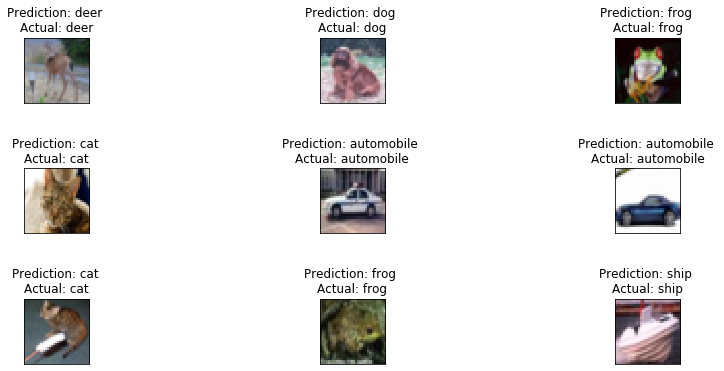

In [73]:
# vreate a grid of 3*3 images 
fig, axs = plt.subplots(3,3,figsize =(15,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    
    #determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {} \nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()